# NN 神经网络/多层感知机

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
0.9537037037037037


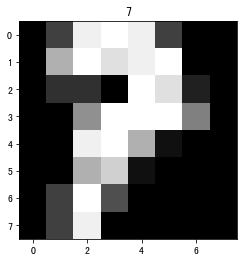

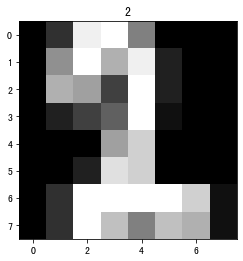

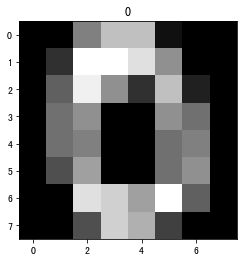

In [51]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def imagesShow(X, y, num):
    for i in range(num):
        plt.title(f'{y[i]}') 
        plt.imshow(X[i].reshape(8,8),cmap='gray')
        plt.show()

# 数据生成
data = load_digits()
X = data.images.reshape(len(data.images), -1)   # (1797, 8, 8) -> (1797, 64)
y = data.target
print(set(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = model = MLPClassifier(hidden_layer_sizes=(16, ),max_iter=500) 
model.fit(X_train, y_train) # 训练
y_pred = model.predict(X_test) 
print(accuracy_score(y_pred, y_test)) # 评估

#imagesShow(X,y,3)
imagesShow(X_test,y_pred,3 )

## 调用sklearn实现NN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

X,y = make_moons(n_samples=200,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=3)

mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[100]).fit(X_train,y_train)
#mlp = MLPClassifier(solver='lbfgs',activation='logistic',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
print('Accuracy on training set:{:.2f}%'.format(mlp.score(X_train,y_train)*100))
print('Accuracy on test set:{:.2f}%'.format(mlp.score(X_test,y_test)*100))

## MINIST 经典数据集LOAD

60000 train+10000 test
http://yann.lecun.com/exdb/mnist/

[Visualization of MLP weights on MNIST — scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py)

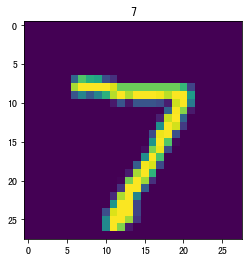

In [94]:
import numpy as np
import os

train_image_file = 'train-images-idx3-ubyte'
train_label_file = 'train-labels-idx1-ubyte'
test_image_file = 't10k-images-idx3-ubyte'
test_label_file = 't10k-labels-idx1-ubyte'

MINIST_PATH='../resource/data/MINIST/'

def openMINIST(image_file,label_file):
    with open(os.path.join(MINIST_PATH,image_file), 'rb') as f1:
        image_file = f1.read()
    with open(os.path.join(MINIST_PATH,label_file), 'rb') as f2:
        label_file = f2.read()

    # offset set, referece to https://www.pythonf.cn/read/58933
    image_file = image_file[16:]   # image_file:bytes
    label_file = label_file[8:]
    
    #print(image_file[12:16].decode('UTF-8','strict'))
    #print(label_file[ 4:8].decode('UTF-8','strict'))
    return image_file,label_file


def showPic(image_file,label_file, num):
    for i in range(num):
        label = label_file[i]
        image_list = [item for item in image_file[i*784:i*784+784]] # image_list:list
        image_np = np.array(image_list, dtype=np.uint8)             #(784,)
        plt.title(f'{label}')
        plt.imshow(image_np.reshape(28,28,1))
        plt.show()

#image_file,label_file = openMINIST(train_image_file, train_label_file)
image_file,label_file = openMINIST(test_image_file, test_label_file)
showPic(image_file,label_file, 0)


image_array = np.frombuffer(image_file, dtype=np.uint8).reshape(-1,784)  #(60000, 784)
label_array = np.frombuffer(label_file, dtype=np.uint8)                  #(60000,)
plt.title(f'{label_array[0]}')
plt.imshow(image_array[0].reshape(28,28,1))
plt.show()

